In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
churn = pd.read_csv("churn.csv")
churn.head()


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_internet_and_phone,partner_dependents,Start_day,Monthly_charges,Validation,Contract Type,Phone Type,Internet Type,Monthly Tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,True,3,2020-05-02,65.6,1,1 Year,One Line,DSL,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,True,0,2020-05-02,59.9,1,Month-to-Month,Two or More Lines,DSL,9.0
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,0,2020-11-02,73.9,1,Month-to-Month,One Line,Fiber Optic,4.0
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,1,2020-02-02,98,1,Month-to-Month,One Line,Fiber Optic,13.0
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,1,2020-11-02,83.9,1,Month-to-Month,One Line,Fiber Optic,3.0


In [4]:
churn.columns = ['customer_id',
 'gender',
 'is_senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 'Tenure_month',
 'FALSE',
 'has_churned',
 'has_phone',
 'has_internet',
 'has_internet_and_phone',
 'partner_dependents',
 'Start_day',
 'Monthly_charges',
 'Validation',
 'Contract Type',
 'Phone Type',
 'Internet Type',
 'Monthly Tenure']

In [5]:
churn.groupby(["contract_type",'is_senior_citizen','has_internet_and_phone'])[['has_churned','monthly_charges']].sum().head(4)
#looks like non seniors churn rate is higher

has_churned  \
contract_type is_senior_citizen has_internet_and_phone                
0             0                 False                           206   
                                True                           1009   
              1                 False                            47   
                                True                            394   

                                                        monthly_charges  
contract_type is_senior_citizen has_internet_and_phone                   
0             0                 False                          21279.45  
                                True                          172388.60  
              1                 False                           3290.30  
                                True                           60366.30

In [6]:
churn.columns.tolist()

['customer_id',
 'gender',
 'is_senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 'Tenure_month',
 'FALSE',
 'has_churned',
 'has_phone',
 'has_internet',
 'has_internet_and_phone',
 'partner_dependents',
 'Start_day',
 'Monthly_charges',
 'Validation',
 'Contract Type',
 'Phone Type',
 'Internet Type',
 'Monthly Tenure']

In [7]:
churn.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'Tenure_month', 'FALSE',
       'has_churned', 'has_phone', 'has_internet', 'has_internet_and_phone',
       'partner_dependents', 'Start_day', 'Monthly_charges', 'Validation',
       'Contract Type', 'Phone Type', 'Internet Type', 'Monthly Tenure'],
      dtype='object')

In [8]:
month_to_month_customers = churn[churn.contract_type ==0]
month_to_month_customers

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_internet_and_phone,partner_dependents,Start_day,Monthly_charges,Validation,Contract Type,Phone Type,Internet Type,Monthly Tenure
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,True,True,0,2020-05-02,59.9,1,Month-to-Month,Two or More Lines,DSL,9.0
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,0,2020-11-02,73.9,1,Month-to-Month,One Line,Fiber Optic,4.0
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,1,2020-02-02,98,1,Month-to-Month,One Line,Fiber Optic,13.0
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,1,2020-11-02,83.9,1,Month-to-Month,One Line,Fiber Optic,3.0
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,...,True,True,2,2020-06-02,69.4,1,Month-to-Month,One Line,DSL,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,18.90,...,False,False,0,2021-01-02,18.9,1,Month-to-Month,One Line,No Internet Service,1.0
7042,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,70.15,...,True,True,0,2021-01-02,70.15,1,Month-to-Month,One Line,Fiber Optic,1.0
7043,NaN,Female,0,No,No,1,0,0,Bank transfer (automatic),20.95,...,False,False,0,2020-10-02,20.95,1,Month-to-Month,One Line,No Internet Service,4.0
7045,NaN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,True,1,2019-04-02,85.1,1,Month-to-Month,Two or More Lines,Fiber Optic,22.0


In [9]:
m2m_churned = month_to_month_customers[month_to_month_customers.churn == 'Yes']
m2m_churned

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_internet_and_phone,partner_dependents,Start_day,Monthly_charges,Validation,Contract Type,Phone Type,Internet Type,Monthly Tenure
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,True,0,2020-11-02,73.9,1,Month-to-Month,One Line,Fiber Optic,4.0
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,True,1,2020-02-02,98,1,Month-to-Month,One Line,Fiber Optic,13.0
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,True,1,2020-11-02,83.9,1,Month-to-Month,One Line,Fiber Optic,3.0
19,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.10,...,True,False,0,2021-01-02,25.1,1,Month-to-Month,No Phone Service,DSL,1.0
21,0023-XUOPT,Female,0,Yes,No,2,2,0,Electronic check,94.10,...,True,True,1,2020-02-02,94.1,1,Month-to-Month,Two or More Lines,Fiber Optic,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,9965-YOKZB,Male,1,No,No,2,2,0,Electronic check,83.85,...,True,True,0,2020-05-02,83.85,1,Month-to-Month,Two or More Lines,Fiber Optic,9.0
7031,9974-JFBHQ,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),30.50,...,True,False,3,2021-01-02,30.5,1,Month-to-Month,No Phone Service,DSL,1.0
7042,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,70.15,...,True,True,0,2021-01-02,70.15,1,Month-to-Month,One Line,Fiber Optic,1.0
7043,NaN,Female,0,No,No,1,0,0,Bank transfer (automatic),20.95,...,False,False,0,2020-10-02,20.95,1,Month-to-Month,One Line,No Internet Service,4.0


In [10]:
m2m_churned.groupby("Internet Type")[['churn']].count()
#fiber optic customers have over double churn of DSL

,churn
Internet Type,
DSL,395
Fiber Optic,1162
No Internet Service,99


In [11]:
m2m_churned.groupby('is_senior_citizen')[['churn']].count()
#seniors vs non. non seniors have higher churn

,churn
is_senior_citizen,
0,1215
1,441


In [12]:
m2m_churned.groupby('partner_dependents')[['churn']].count()
#singles have almost twice the churn rate

,churn
partner_dependents,
0,1047
1,349
2,68
3,192


In [13]:
m2m_churned.groupby('gender')[['churn']].count()


,churn
gender,
Female,843
Male,813


In [22]:
m2m_churned['Monthly Tenure'].describe()

count    1656.000000
mean       14.001812
std        15.866417
min         1.000000
25%         2.000000
50%         7.000000
75%        21.000000
max        72.000000
Name: Monthly Tenure, dtype: float64

In [44]:
m2m_churned['Monthly Tenure'].mode()

0    1.0
dtype: float64

In [26]:
m2m_churned.monthly_charges.describe()

count    1656.000000
mean       72.993720
std        24.099529
min        18.850000
25%        55.187500
50%        79.025000
75%        90.862500
max       117.450000
Name: monthly_charges, dtype: float64

In [32]:
m2m_churned.monthly_charges.mode()

0    74.4
dtype: float64

In [31]:
m2m_churned.groupby('Phone Type')[['churn']].count()
#1 or 2 phone lines has equal churn

,churn
Phone Type,
No Phone Service,154
One Line,780
Two or More Lines,722


<AxesSubplot:ylabel='Frequency'>

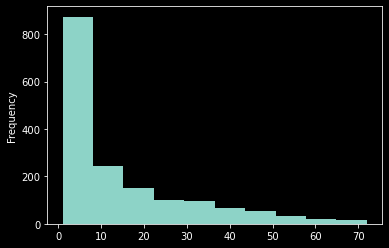

In [46]:
m2m_churned['Monthly Tenure'].plot.hist(bins=10)

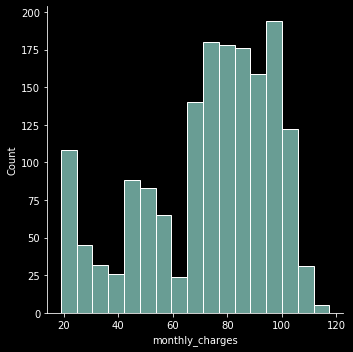

In [57]:
sns.displot(m2m_churned.monthly_charges)